# Fashion MNIST Data set

The Fashion MNIST dataset is a collection of grayscale images representing 10 different fashion categories. Each image is 28x28 pixels in size, and the dataset consists of 60,000 training images and 10,000 testing images. The goal is to classify these images into one of the following categories:


1.   T-shirt/top
2.   Trouser
3.   Pullover
4.   Dress
5.   Coat
6.   Sandal
7.   Shirt
8.   Sneaker
9.   Bag
10.  Ankle boot


<img src= "https://www.researchgate.net/publication/349913991/figure/fig4/AS:999291262861319@1615261011992/Fashion-MNIST-dataset.ppm" >

We can load this dataset with the tensorflow.keras package. Load this data by running the following code.

In [8]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Display the shapes of the loaded data
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


In [23]:
import numpy as np

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Display the shapes of the loaded data
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

# Display the shape of an individual image
print("Shape of an individual image:", x_train[0].shape)

# Display the first image in the training set
print("First image in the training set:")
print(x_train[0])

# Display the label of the first image
print("Label of the first image:", y_train[0])


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)
Shape of an individual image: (28, 28)
First image in the training set:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 10

Label of the first image: 9 



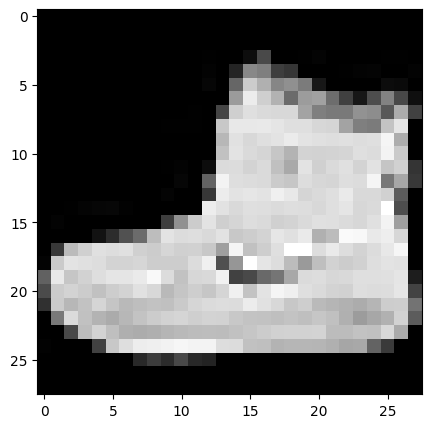

In [21]:
# Display the label of an individual image
print(f"Label of the first image: {y_train[0]} \n")

# Display the first image in the training set
plt.figure(figsize=(6, 5))
plt.imshow(x_train[0], cmap="gray")
plt.show()


# Image Flattening
Basic dense neural networks take feature vectors and pass them through the initial layer (0-th or first layer) of the computational graph, which is depicted by the neural network structure as column vectors. This initial layer is akin to the layer in single neuron models. To input images into this network, it is necessary to convert the matrix into a column vector by flattening it.

<img src= "https://i0.wp.com/developersbreach.com/wp-content/uploads/2020/08/cnn_banner.png?fit=1200%2C564&ssl=1" >

For each image matrix under consideration, we can achieve this by employing the flatten() method in conjunction with the reshape(784, 1) method to ensure it becomes a column vector. It's important to note that each image matrix is initially sized at 28 by 28, making 784 the number of rows in the resulting flattened matrix column vector. The numerical values within the flattened training and testing data matrices range from 0 to 255. The substantial variation in potential values may pose challenges during the training of the neural network's weights and biases. A simple remedy is to scale all the data to fit within the interval [0, 1], achieved by dividing each entry by the largest possible value, which is 255 in this case.

# One-Hot Encoding
The provided code performs the following tasks: it scales our training and testing data, reshapes our images, assigns them new variable names, and applies one-hot encoding to the labels.

In [25]:
# Scale the data for training.
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the training images into column vectors.
flat_x_train = []
# One hot encode the training labels
onehot_y_train = []

for x, y in zip(x_train, y_train):
    flat_x_train.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y][0] = 1.0
    onehot_y_train.append(temp_vec)

# Do the same for the testing data
flat_x_test = []
onehot_y_test = []

for x, y in zip(x_test, y_test):
    flat_x_test.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y] = 1.0
    onehot_y_test.append(temp_vec)

# Building the Network Architecture



In [26]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z) * (1.0 - sigmoid(z))

def mse(a, y):
    return 0.5 * np.sum((a - y)**2)

Following that, we'll create a custom function to initialize the weight matrices and bias column vectors for a dense neural network. Execute the provided code to accomplish this task.

In [27]:
def initialize_weights(layers=[784, 60, 60, 10]):
    """
    Initialize weights and biases for a neural network with given layer sizes.

    Parameters:
    - layers (list): List of integers representing the number of neurons in each layer.

    Returns:
    - W (list): List of weight matrices connecting layers.
    - B (list): List of bias matrices for each layer.
    """
    # The following Python lists will contain numpy matrices
    # connected the layers in the neural network
    W = [[0.0]]
    B = [[0.0]]

    for i in range(1, len(layers)):
        # The scaling factor is something I found in a research paper :)
        w_temp = np.random.randn(layers[i], layers[i-1]) * np.sqrt(2 / layers[i-1])
        b_temp = np.random.randn(layers[i], 1) * np.sqrt(2 / layers[i-1])

        W.append(w_temp)
        B.append(b_temp)

    return W, B


# Feedforward Phase
The feedforward phase in a neural network refers to the process in which input data is passed through the network layer by layer, without any feedback loops or adjustments to the weights. During this phase, each layer performs a weighted sum of its input followed by the application of an activation function. The output from one layer serves as the input to the next layer, and this process continues until the data reaches the output layer. The feedforward phase is the initial step in the neural network's operation and is responsible for producing the network's prediction or output based on the given input.

For $\ell = 1, \dots, L$, each layer $\ell$ within our network undergoes two phases. Firstly, there is the preactivation phase represented by $$\mathbf{z}^{\ell} = W^{\ell}\mathbf{a}^{\ell-1} + \mathbf{b}^{\ell},$$ followed by the postactivation phase $$\mathbf{a}^{\ell} = \sigma(\mathbf{z}^{\ell}).$$ In the preactivation phase, a weighted linear combination of postactivation values from the preceding layer is computed. The postactivation phase involves applying an activation function elementwise to the preactivation values. It's worth noting that $\mathbf{a}^0 = \mathbf{x}^{(i)}$, where $\mathbf{x}^{(i)}$ represents the current input data into our network.

To examine the effectiveness of our activation functions and validate matrix dimensions, you can use the provided code. This code manually executes the feedforward process on a neural network with the specified dimensions.

In [28]:
W, B = initialize_weights()

# Assuming xi and yi are defined from your previous code
xi = flat_x_train[0]
yi = onehot_y_train[0]
a0 = xi

print(f"np.shape(a0) = {np.shape(a0)} \n")

# First hidden layer
z1 = W[1] @ a0 + B[1]
a1 = sigmoid(z1)

print(f"np.shape(W[1]) = {np.shape(W[1])}")
print(f"np.shape(z1) = {np.shape(z1)}")
print(f"np.shape(a1) = {np.shape(a1)} \n")

# Second hidden layer
z2 = W[2] @ a1 + B[2]
a2 = sigmoid(z2)

print(f"np.shape(W[2]) = {np.shape(W[2])}")
print(f"np.shape(z2) = {np.shape(z2)}")
print(f"np.shape(a2) = {np.shape(a2)} \n")

# Output layer
z3 = W[3] @ a2 + B[3]
a3 = sigmoid(z3)
y_hat = a3

print(f"np.shape(W[3]) = {np.shape(W[3])}")
print(f"np.shape(z3) = {np.shape(z3)}")
print(f"np.shape(a3) = {np.shape(a3)} \n")

print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")


np.shape(a0) = (784, 1) 

np.shape(W[1]) = (60, 784)
np.shape(z1) = (60, 1)
np.shape(a1) = (60, 1) 

np.shape(W[2]) = (60, 60)
np.shape(z2) = (60, 1)
np.shape(a2) = (60, 1) 

np.shape(W[3]) = (10, 60)
np.shape(z3) = (10, 1)
np.shape(a3) = (10, 1) 

Prediction: np.argmax(y_hat) = 3
Target Label: np.argmax(yi) = 9
mse(y_hat, yi) = 1.474916058764427


We have the option to encapsulate these lines of code within a `for` loop and encapsulate it in a callable function. The subsequent code accomplishes precisely that.

In [29]:
def forward_pass(W, B, xi, predict_vector=False):
    """
    Perform a forward pass through the neural network.

    Parameters:
    - W (list): List of weight matrices connecting layers.
    - B (list): List of bias matrices for each layer.
    - xi (numpy.ndarray): Input vector for the forward pass.
    - predict_vector (bool): If True, return the final prediction vector. If False, return intermediate values.

    Returns:
    - Z (list): List of weighted sums at each layer.
    - A (list): List of activation vectors at each layer.
    """
    Z = [[0.0]]
    A = [xi]
    L = len(W) - 1

    for i in range(1, L + 1):
        z = W[i] @ A[i-1] + B[i]
        Z.append(z)

        a = sigmoid(z)
        A.append(a)

    if not predict_vector:
        return Z, A
    else:
        return A[-1]

def predict(W, B, xi):
    """
    Make a prediction using the trained neural network.

    Parameters:
    - W (list): List of weight matrices connecting layers.
    - B (list): List of bias matrices for each layer.
    - xi (numpy.ndarray): Input vector for making a prediction.

    Returns:
    - int: Predicted class label.
    """
    _, A = forward_pass(W, B, xi)
    return np.argmax(A[-1])

# Assuming xi and yi are defined from your previous code
y_hat = forward_pass(W, B, flat_x_train[0], predict_vector=True)
print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")


Prediction: np.argmax(y_hat) = 3
Target Label: np.argmax(yi) = 9
mse(y_hat, yi) = 1.474916058764427


Next, we will proceed to create a custom function for generating predictions on a random data point. Additionally, we will develop a mean squared error function designed to calculate the error across an entire set of features and labels.

In [30]:
def random_experiment(W, B, data_features, data_labels):
    """
    Perform a random experiment by selecting a random example from the dataset,
    printing the actual and predicted labels.

    Parameters:
    - W (list): List of weight matrices connecting layers.
    - B (list): List of bias matrices for each layer.
    - data_features (list): List of input vectors (features).
    - data_labels (list): List of one-hot encoded labels for the input vectors.
    """
    i = np.random.randint(len(data_features))
    print(f"Actual label: {np.argmax(data_labels[i])}")
    print(f"Predicted label: {predict(W, B, data_features[i])}")

def MSE(W, B, X, y):
    """
    Calculate the mean squared error (MSE) for a given dataset.

    Parameters:
    - W (list): List of weight matrices connecting layers.
    - B (list): List of bias matrices for each layer.
    - X (list): List of input vectors (features).
    - y (list): List of one-hot encoded labels for the input vectors.

    Returns:
    - float: Mean squared error.
    """
    cost = 0.0
    m = 0

    for xi, yi in zip(X, y):
        a = forward_pass(W, B, xi, predict_vector=True)
        cost += mse(a, yi)
        m += 1

    return cost / m


In [32]:
# Calculate and print the mean squared error on the training dataset
mse_train = MSE(W, B, flat_x_train, onehot_y_train)
print(f"MSE on Training Data: {mse_train} \n")

# Perform a random experiment on the training dataset
random_experiment(W, B, flat_x_train, onehot_y_train)


MSE on Training Data: 1.4588040043661592 

Actual label: 1
Predicted label: 3


# Backpropogation Phase with Stochastic Gradient Descent

We are now prepared to define a custom Python DenseNetwork class, which initializes the weights and bias for the network and implements stochastic gradient descent as outlined below:

1. Iterate for each $i = 1, \dots, N$.

2. Perform feedforward for $\mathbf{x}^{(i)}$ through the network.

3. Calculate $\delta^{L} = \nabla_aC\otimes \sigma'(\mathbf{z}^{L})$.

4. For $\ell = L-1, \dots, 1$, compute $\delta^{\ell} = \big ( (\mathbf{w}^{\ell + 1})^{T} \delta^{\ell + 1} \Big )\otimes \sigma'(\mathbf{z}^{\ell})$.

5. For $\ell = L, L-1, \dots, 1$,

$$
w^{\ell} \leftarrow w^{\ell} - \alpha \delta^{\ell}(\mathbf{a}^{\ell-1})^{T}
$$

$$
b^{\ell} \leftarrow b^{\ell} - \alpha \delta^{\ell}
$$

In [34]:
class DenseNetwork(object):
    def __init__(self, layers=[784, 60, 60, 10]):
        """
        Initialize a dense neural network with given layer sizes.

        Parameters:
        - layers (list): List of integers representing the number of neurons in each layer.
        """
        self.layers = layers
        self.W, self.B = initialize_weights(layers=self.layers)

    def train(self, X_train, y_train, alpha=0.046, epochs=4):
        """
        Train the neural network using stochastic gradient descent.

        Parameters:
        - X_train (list): List of input vectors for training.
        - y_train (list): List of one-hot encoded labels for the training data.
        - alpha (float): Learning rate for gradient descent.
        - epochs (int): Number of training epochs.
        """
        # Print the initial mean squared error
        self.errors_ = [MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost = {self.errors_[0]}")

        # Find the sample size
        sample_size = len(X_train)

        # Find the number of non-input layers
        L = len(self.layers) - 1

        # For each epoch, perform stochastic gradient descent
        for k in range(epochs):
            # Loop over each (xi, yi) training pair of data
            for xi, yi in zip(X_train, y_train):
                # Use the forward pass function to find preactivation and postactivation values
                Z, A = forward_pass(self.W, self.B, xi)

                # Store the errors in a dictionary for clear interpretation of computation of these values
                deltas = dict()

                # Compute the output error
                output_error = (A[L] - yi) * d_sigmoid(Z[L])
                deltas[L] = output_error

                # Loop from L-1 to 1
                for i in range(L-1, 0, -1):
                    # Compute the node errors at each hidden layer
                    deltas[i] = (self.W[i+1].T @ deltas[i+1]) * d_sigmoid(Z[i])

                # Loop over each hidden layer and the output layer to perform gradient descent
                for i in range(1, L+1):
                    self.W[i] -= alpha * deltas[i] @ A[i-1].T
                    self.B[i] -= alpha * deltas[i]

            # Show the user the cost over all training examples
            self.errors_.append(MSE(self.W, self.B, X_train, y_train))
            print(f"{k + 1}-Epoch Cost = {self.errors_[-1]}")

    def predict(self, xi):
        """
        Make a prediction using the trained neural network.

        Parameters:
        - xi (numpy.ndarray): Input vector for making a prediction.

        Returns:
        - int: Predicted class label.
        """
        depth = len(self.layers)
        _, A = forward_pass(self.W, self.B, xi)
        return np.argmax(A[-1])

Starting Cost = 1.8496928770730305
1-Epoch Cost = 0.13041693848344824
2-Epoch Cost = 0.11278181838249958
3-Epoch Cost = 0.10411974130687751
4-Epoch Cost = 0.0984681890913346
Initial MSE on Training Data: 0.0984681890913346 

Predicted digit: 7
Actual digit: 7


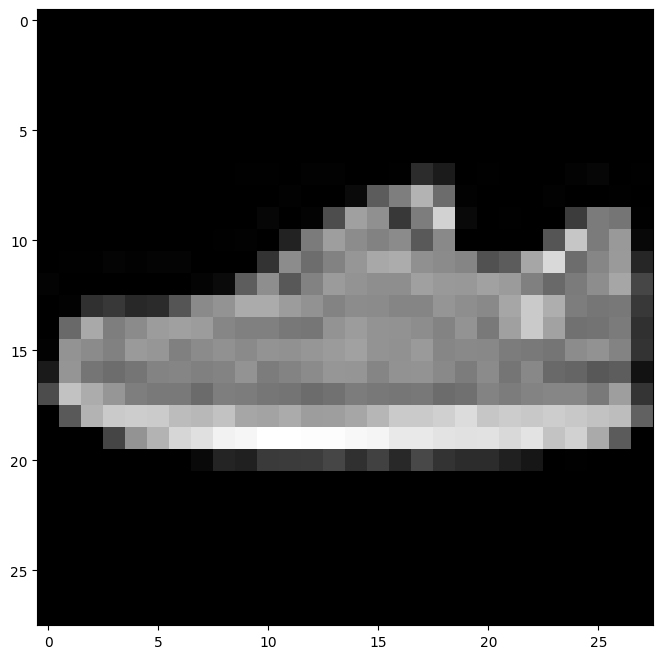

In [48]:
# Initialize a network with 784 input nodes, two hidden layers with 120 and 145 nodes,
# and an output layer with 10 nodes.
net = DenseNetwork(layers=[784, 120, 145, 120, 10])

# Train your network with stochastic gradient descent!
net.train(flat_x_train, onehot_y_train, alpha=0.046, epochs=4)

# Check the mean squared error before training
initial_mse = MSE(net.W, net.B, flat_x_train, onehot_y_train)
print(f"Initial MSE on Training Data: {initial_mse} \n")

# Make a random prediction before training
i = np.random.randint(0, len(flat_x_train))
prediction = net.predict(flat_x_train[i])
actual_digit = np.argmax(onehot_y_train[i])

print(f"Predicted digit: {prediction}")
print(f"Actual digit: {actual_digit}")

# Display the corresponding image
plt.figure(figsize=(8, 8))
plt.imshow(flat_x_train[i].reshape(28, 28), cmap="gray")  # Reshape the flattened image
plt.show()



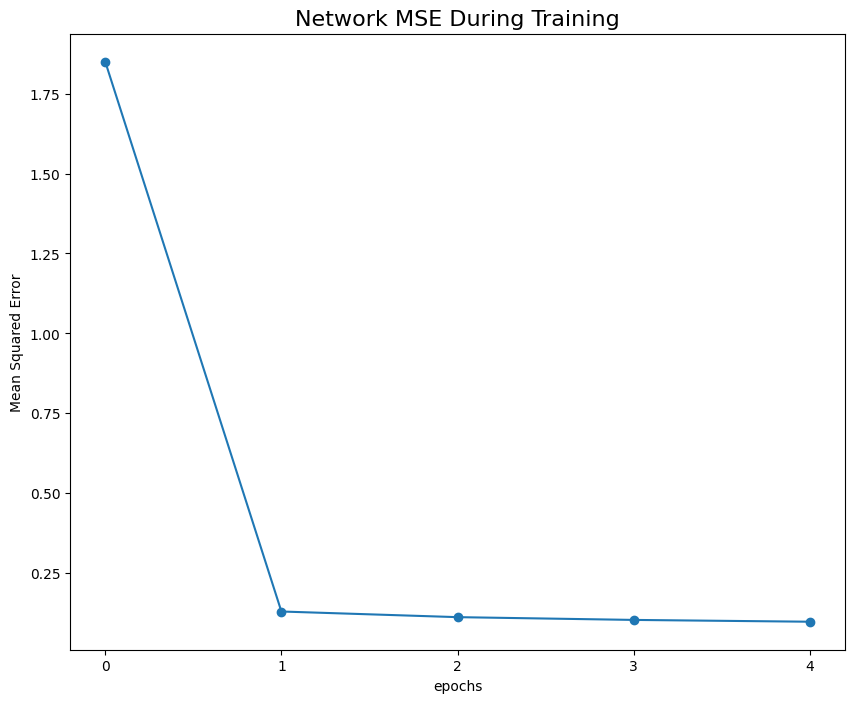

In [49]:
# Visualize the mean squared error over the training process
plt.figure(figsize = (10, 8))
epochs = range(len(net.errors_))
plt.plot(epochs, net.errors_, marker = "o")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")
plt.title("Network MSE During Training", fontsize = 16)
plt.show()

predicted digit is: 1
actual digit is: 1


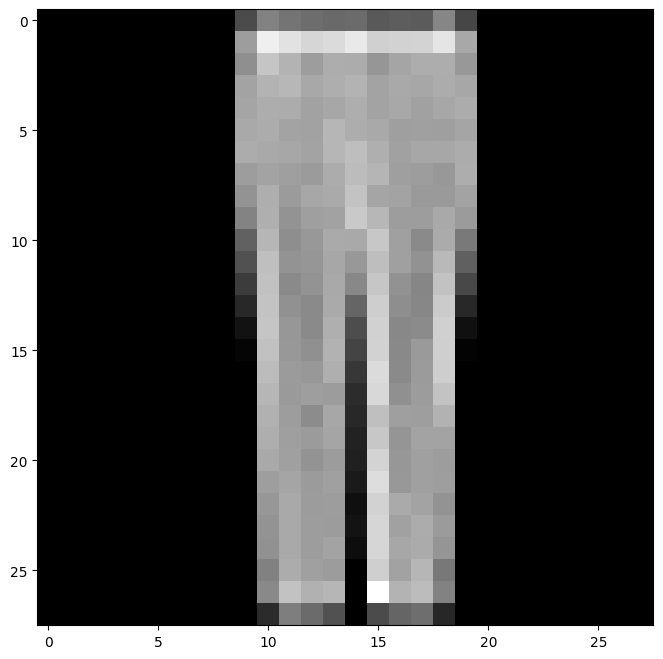

In [50]:
i = np.random.randint(0, len(flat_x_test))
prediction = net.predict(flat_x_test[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_y_test[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(x_test[i], cmap="gray")
plt.show()

predicted digit is: 2
actual digit is: 2


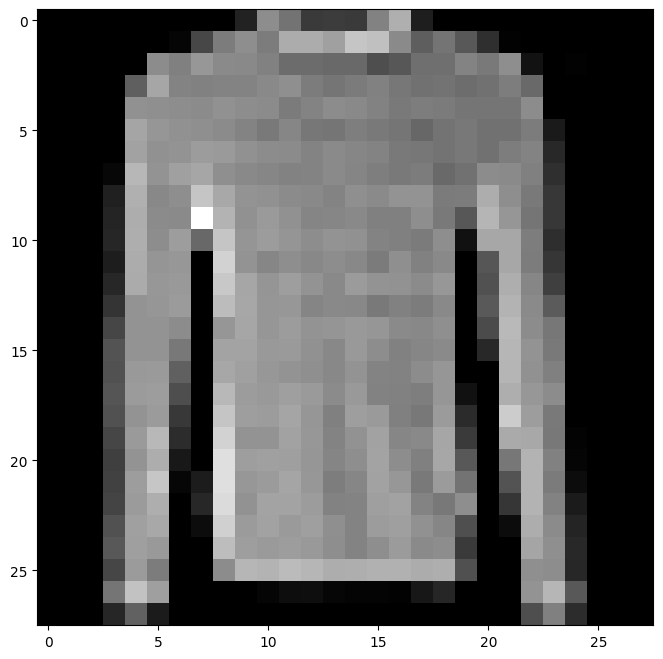

In [51]:
i = np.random.randint(0, len(flat_x_test))
prediction = net.predict(flat_x_test[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_y_test[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(x_test[i], cmap="gray")
plt.show()

So far our Model looks like is well trained and is getting the same prediction digit.

# Classification Error

Now, let's compute the classification percentage on the testing data for our trained dense neural network. Remember, this is determined by dividing the number of correct labels by the total number of data points. Execute the following code to achieve this.

In [52]:
# Compute the classification accuracy of our trained model on the test data
sum([int(net.predict(x) == y) for x, y in zip(flat_x_test, y_test)])/len(onehot_y_test)

0.8482

# Conclusion

In this code implementation, we built a neural network using the Fashion MNIST dataset.  We utilized the sigmoid activation function and mean squared error as the loss function during the training process. The implementation includes key functions such as weight initialization, forward pass, training, and prediction. Visualizing the mean squared error over epochs demonstrated the network's learning progress. Overall, the code showcases a practical approach to constructing and training a dense neural network for image classification tasks using the Fashion MNIST dataset.